# Facial Keypoints Detection


# Required libraries

In [ ]:
import glob
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import random
import urllib.request

In [ ]:
train = pd.read_csv("training.csv")

In [ ]:
test = pd.read_csv("test.csv")

In [ ]:
train.head()

left_eye_center_x  left_eye_center_y  right_eye_center_x  \
0          66.033564          39.002274           30.227008   
1          64.332936          34.970077           29.949277   
2          65.057053          34.909642           30.903789   
3          65.225739          37.261774           32.023096   
4          66.725301          39.621261           32.244810   

   right_eye_center_y  left_eye_inner_corner_x  left_eye_inner_corner_y  \
0           36.421678                59.582075                39.647423   
1           33.448715                58.856170                35.274349   
2           34.909642                59.412000                36.320968   
3           37.261774                60.003339                39.127179   
4           38.042032                58.565890                39.621261   

   left_eye_outer_corner_x  left_eye_outer_corner_y  right_eye_inner_corner_x  \
0                73.130346                39.969997                 36.356571   
1                70.722723                36.187166                 36.034723   
2                70.984421                36.320968                 37.678105   
3                72.314713                38.380967                 37.618643   
4                72.515926                39.884466                 36.982380   

   right_eye_inner_corner_y  ...  nose_tip_y  mouth_left_corner_x  \
0                 37.389402  ...   57.066803            61.195308   
1                 34.361532  ...   55.660936            56.421447   
2                 36.320968  ...   53.538947            60.822947   
3                 38.754115  ...   54.166539            65.598887   
4                 39.094852  ...   64.889521            60.671411   

   mouth_left_corner_y  mouth_right_corner_x  mouth_right_corner_y  \
0            79.970165             28.614496             77.388992   
1            76.352000             35.122383             76.047660   
2            73.014316             33.726316             72.732000   
3            72.703722             37.245496             74.195478   
4            77.523239             31.191755             76.997301   

   mouth_center_top_lip_x  mouth_center_top_lip_y  mouth_center_bottom_lip_x  \
0               43.312602               72.935459                  43.130707   
1               46.684596               70.266553                  45.467915   
2               47.274947               70.191789                  47.274947   
3               50.303165               70.091687                  51.561183   
4               44.962748               73.707387                  44.227141   

   mouth_center_bottom_lip_y  \
0                  84.485774   
1                  85.480170   
2                  78.659368   
3                  78.268383   
4                  86.871166   

                                               Image  
0  238 236 237 238 240 240 239 241 241 243 240 23...  
1  219 215 204 196 204 211 212 200 180 168 178 19...  
2  144 142 159 180 188 188 184 180 167 132 84 59 ...  
3  193 192 193 194 194 194 193 192 168 111 50 12 ...  
4  147 148 160 196 215 214 216 217 219 220 206 18...  

[5 rows x 31 columns]

In [ ]:
test.head()

ImageId                                              Image
0        1  182 183 182 182 180 180 176 169 156 137 124 10...
1        2  76 87 81 72 65 59 64 76 69 42 31 38 49 58 58 4...
2        3  177 176 174 170 169 169 168 166 166 166 161 14...
3        4  176 174 174 175 174 174 176 176 175 171 165 15...
4        5  50 47 44 101 144 149 120 58 48 42 35 35 37 39 ...

EDA

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   left_eye_center_x          282 non-null    float64
 1   left_eye_center_y          282 non-null    float64
 2   right_eye_center_x         282 non-null    float64
 3   right_eye_center_y         282 non-null    float64
 4   left_eye_inner_corner_x    282 non-null    float64
 5   left_eye_inner_corner_y    282 non-null    float64
 6   left_eye_outer_corner_x    282 non-null    float64
 7   left_eye_outer_corner_y    282 non-null    float64
 8   right_eye_inner_corner_x   282 non-null    float64
 9   right_eye_inner_corner_y   282 non-null    float64
 10  right_eye_outer_corner_x   282 non-null    float64
 11  right_eye_outer_corner_y   282 non-null    float64
 12  left_eyebrow_inner_end_x   282 non-null    float64
 13  left_eyebrow_inner_end_y   282 non-null    float64

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284 entries, 0 to 283
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   ImageId  284 non-null    int64 
 1   Image    284 non-null    object
dtypes: int64(1), object(1)
memory usage: 4.6+ KB


In [ ]:
train.isnull().sum().sum()

np.int64(2)

Sample Visualization with Keypoints

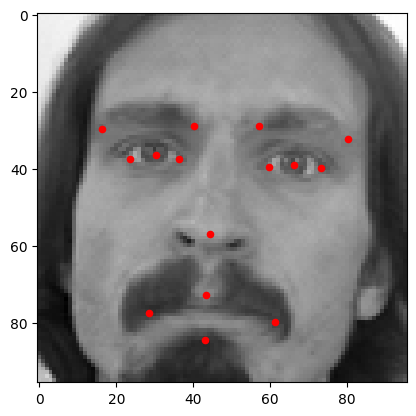

In [ ]:
sample = train.iloc[0]
image = np.fromstring(sample["Image"], sep=' ').reshape(96,96)
plt.imshow(image, cmap="gray")
plt.scatter(sample[0:-1:2], sample[1:-1:2], c="red", s=20)

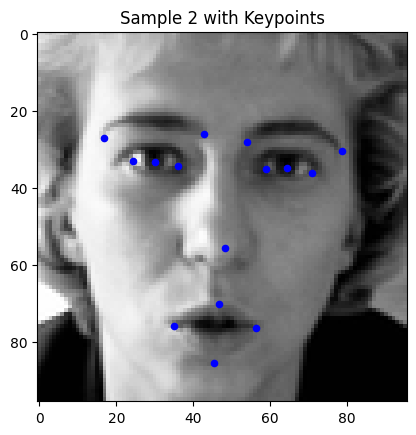

In [ ]:
sample = train.iloc[1]
image = np.fromstring(sample["Image"], sep=" ").reshape(96,96)
plt.imshow(image, cmap="gray")
plt.scatter(sample[0:-1:2], sample[1:-1:2], c="blue", s=20)  # keypoints in blue
plt.title("Sample 2 with Keypoints")
plt.show()

Face Detection

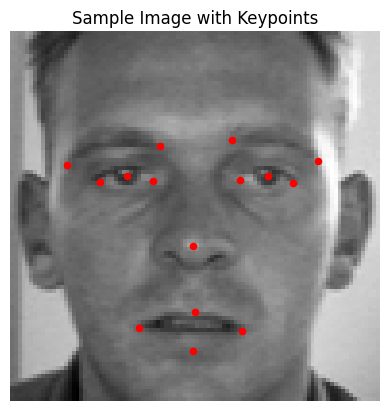

Number of faces detected: 1


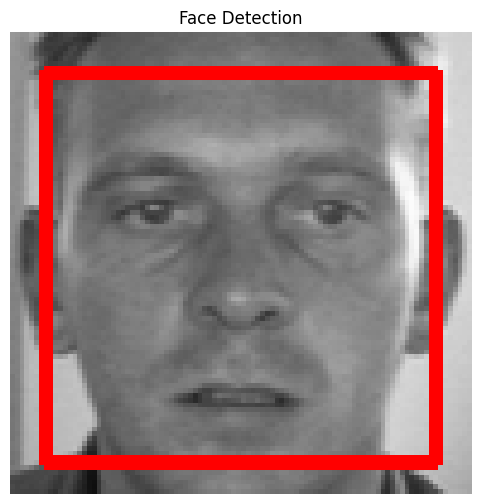

In [ ]:

# Load training data
train = pd.read_csv("training.csv")

# Pick a random sample image
sample_index = random.randint(0, len(train)-1)
sample = train.iloc[sample_index]
image = np.fromstring(sample["Image"], sep=' ').reshape(96, 96)

# Plot keypoints
plt.imshow(image, cmap="gray")
plt.scatter(sample[0:-1:2], sample[1:-1:2], c="red", s=20)
plt.title("Sample Image with Keypoints")
plt.axis('off')
plt.show()

# Convert to 3-channel image
image_rgb = cv2.cvtColor(image.astype(np.uint8), cv2.COLOR_GRAY2RGB)

# Load Haar cascade from OpenCV
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

if face_cascade.empty():
    print("Haar cascade XML file could not be loaded.")
else:
    # Detect faces
    faces = face_cascade.detectMultiScale(image_rgb, scaleFactor=1.25, minNeighbors=6)
    print("Number of faces detected:", len(faces))

    # Draw bounding boxes
    image_with_detections = np.copy(image_rgb)
    for (x, y, w, h) in faces:
        cv2.rectangle(image_with_detections, (x, y), (x+w, y+h), (255, 0, 0), 2)

    # Display the image with detections
    plt.figure(figsize=(6,6))
    plt.imshow(image_with_detections)
    plt.title("Face Detection")
    plt.axis('off')
    plt.show()


Face and Eye Detection

Number of faces detected: 1


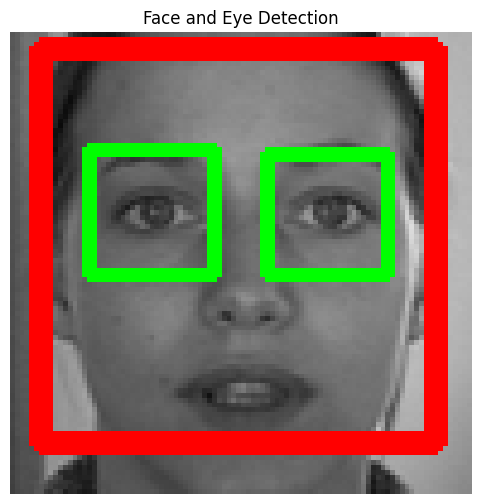

In [ ]:
# Pick a random sample image
sample_index = random.randint(0, len(train)-1)
sample = train.iloc[sample_index]
image = np.fromstring(sample["Image"], sep=' ').reshape(96, 96)

# Convert to uint8 for OpenCV
gray = image.astype(np.uint8)

# Load Haar cascades
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

# Detect faces
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.25, minNeighbors=6)
print('Number of faces detected:', len(faces))

# Make a copy of the original image to plot rectangle detections
image_with_detections = cv2.cvtColor(gray, cv2.COLOR_GRAY2RGB)

# Draw face rectangles
for (x,y,w,h) in faces:
    cv2.rectangle(image_with_detections, (x,y), (x+w,y+h), (255,0,0), 3)

    # Detect eyes within each face region
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = image_with_detections[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray, scaleFactor=1.02, minNeighbors=3)

    # Draw eye rectangles
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color, (ex,ey), (ex+ew, ey+eh), (0,255,0), 2)

# Plot the image with both faces and eyes detected
plt.figure(figsize=(6,6))
plt.imshow(image_with_detections)
plt.title("Face and Eye Detection")
plt.axis('off')
plt.show()

Image with Gaussian Noise

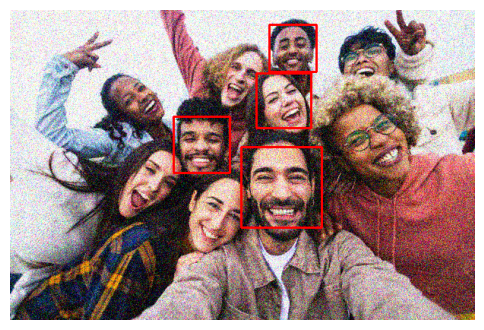

Number of faces detected: 4
Number of eyes detected: 0


In [ ]:
image = cv2.imread("noise.jpg")
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

noise_level = 40
noise = np.random.randn(*image_rgb.shape) * noise_level
noisy_image = image_rgb + noise
noisy_image = np.clip(noisy_image, 0, 255).astype(np.uint8)

face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

gray = cv2.cvtColor(noisy_image, cv2.COLOR_RGB2GRAY)

faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)

image_with_detections = np.copy(noisy_image)
for (x, y, w, h) in faces:
    cv2.rectangle(image_with_detections, (x, y), (x + w, y + h), (255, 0, 0), 2)
    roi_gray = gray[y:y + h, x:x + w]
    roi_color = image_with_detections[y:y + h, x:x + w]
    eyes = eye_cascade.detectMultiScale(roi_gray, scaleFactor=1.1, minNeighbors=5)
    for (ex, ey, ew, eh) in eyes:
        cv2.rectangle(roi_color, (ex, ey), (ex + ew, ey + eh), (0, 255, 0), 2)

plt.figure(figsize=(6,6))
plt.imshow(image_with_detections)
plt.axis('off')
plt.show()

print("Number of faces detected:", len(faces))
total_eyes = sum([len(eye_cascade.detectMultiScale(gray[y:y+h, x:x+w])) for (x,y,w,h) in faces])
print("Number of eyes detected:", total_eyes)


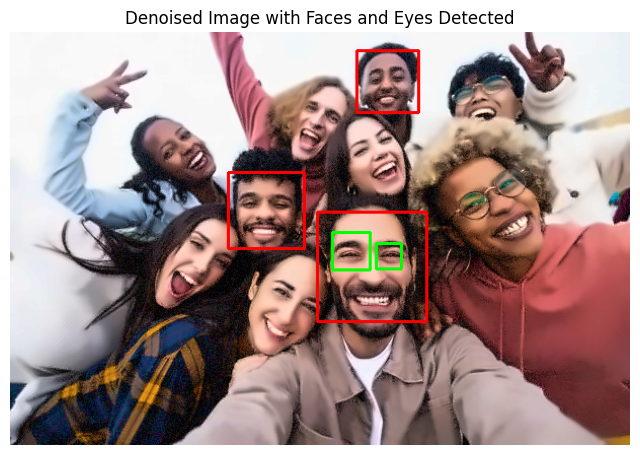

Number of faces detected: 3
Number of eyes detected: 2


In [ ]:
image = cv2.imread('noise.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

noise_level = 15
noise = np.random.randn(*image_rgb.shape) * noise_level
noisy_image = image_rgb + noise
noisy_image = np.clip(noisy_image, 0, 255).astype(np.uint8)

denoised_image = cv2.fastNlMeansDenoisingColored(noisy_image, None, 10, 10, 7, 21)

face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

gray = cv2.cvtColor(denoised_image, cv2.COLOR_RGB2GRAY)

faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)

image_with_detections = np.copy(denoised_image)
total_eyes = 0

for (x, y, w, h) in faces:
    cv2.rectangle(image_with_detections, (x, y), (x + w, y + h), (255, 0, 0), 2)
    roi_gray = gray[y:y + h, x:x + w]
    roi_color = image_with_detections[y:y + h, x:x + w]
    eyes = eye_cascade.detectMultiScale(roi_gray, scaleFactor=1.1, minNeighbors=5)
    total_eyes += len(eyes)
    for (ex, ey, ew, eh) in eyes:
        cv2.rectangle(roi_color, (ex, ey), (ex + ew, ey + eh), (0, 255, 0), 2)

plt.figure(figsize=(8,8))
plt.imshow(image_with_detections)
plt.axis('off')
plt.title('Denoised Image with Faces and Eyes Detected')
plt.show()

print("Number of faces detected:", len(faces))
print("Number of eyes detected:", total_eyes)

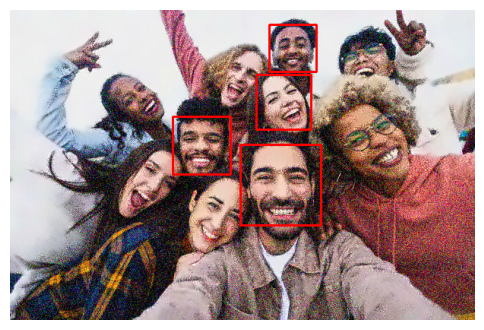

Number of faces detected: 4
Number of eyes detected: 0


In [ ]:
image = cv2.imread('noise.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

noise_level = 40
noise = np.random.randn(*image_rgb.shape) * noise_level
noisy_image = np.clip(image_rgb + noise, 0, 255).astype(np.uint8)

denoised_image = cv2.fastNlMeansDenoisingColored(noisy_image, None, 10, 10, 7, 21)

face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

gray = cv2.cvtColor(denoised_image, cv2.COLOR_RGB2GRAY)

faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)

image_with_detections = np.copy(denoised_image)
for (x, y, w, h) in faces:
    cv2.rectangle(image_with_detections, (x, y), (x + w, y + h), (255, 0, 0), 2)
    roi_gray = gray[y:y + h, x:x + w]
    roi_color = image_with_detections[y:y + h, x:x + w]
    eyes = eye_cascade.detectMultiScale(roi_gray, scaleFactor=1.1, minNeighbors=5)
    for (ex, ey, ew, eh) in eyes:
        cv2.rectangle(roi_color, (ex, ey), (ex + ew, ey + eh), (0, 255, 0), 2)

plt.figure(figsize=(6,6))
plt.imshow(image_with_detections)
plt.axis('off')
plt.show()

print("Number of faces detected:", len(faces))
total_eyes = sum([len(eye_cascade.detectMultiScale(gray[y:y+h, x:x+w])) for (x,y,w,h) in faces])
print("Number of eyes detected:", total_eyes)

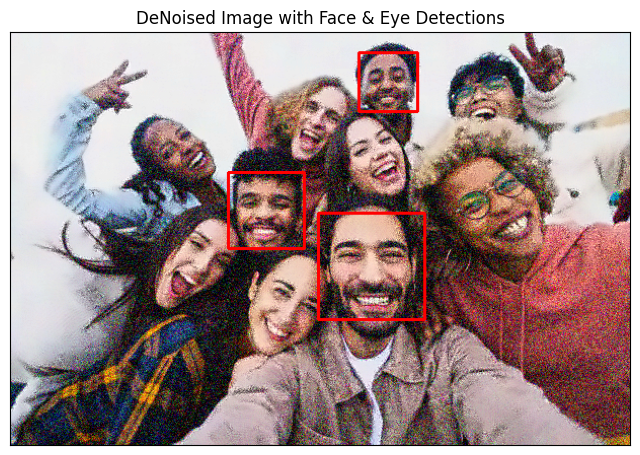

Number of faces detected: 3
Number of eyes detected: 0


In [ ]:
# Load image from local file
image = cv2.imread('noise.jpg')

# Convert to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Add noise
noise_level = 40
noise = np.random.randn(*image_rgb.shape) * noise_level
image_with_noise = np.clip(image_rgb + noise, 0, 255).astype(np.uint8)

# Denoise the noisy image
denoised_image = cv2.fastNlMeansDenoisingColored(image_with_noise, None, 10, 10, 7, 21)

# Convert to grayscale for detection
gray = cv2.cvtColor(denoised_image, cv2.COLOR_RGB2GRAY)

# Load Haar cascades
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

# Detect faces
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)

# Draw rectangles around faces and eyes
image_with_detections = np.copy(denoised_image)
for (x, y, w, h) in faces:
    cv2.rectangle(image_with_detections, (x, y), (x + w, y + h), (255, 0, 0), 2)
    roi_gray = gray[y:y + h, x:x + w]
    roi_color = image_with_detections[y:y + h, x:x + w]
    eyes = eye_cascade.detectMultiScale(roi_gray, scaleFactor=1.1, minNeighbors=5)
    for (ex, ey, ew, eh) in eyes:
        cv2.rectangle(roi_color, (ex, ey), (ex + ew, ey + eh), (0, 255, 0), 2)

# Display the denoised image with detections
fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(111)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_title('DeNoised Image with Face & Eye Detections')
ax1.imshow(image_with_detections)
plt.show()

print("Number of faces detected:", len(faces))
total_eyes = sum([len(eye_cascade.detectMultiScale(gray[y:y+h, x:x+w])) for (x,y,w,h) in faces])
print("Number of eyes detected:", total_eyes)

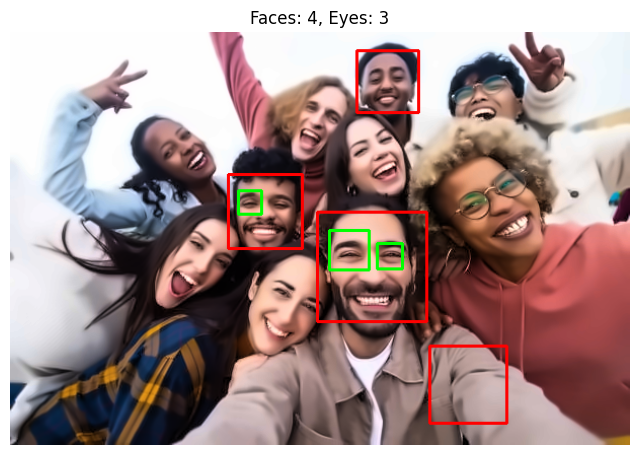

In [ ]:
# noise.jpg dosyasını oku
image_rgb = cv2.imread('noise.jpg')
image_rgb = cv2.cvtColor(image_rgb, cv2.COLOR_BGR2RGB)

# görüntüyü temizle
denoised_image = cv2.fastNlMeansDenoisingColored(image_rgb, None, 10, 10, 7, 21)

# yüz ve göz kaskadlarını yükle
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

gray = cv2.cvtColor(denoised_image, cv2.COLOR_RGB2GRAY)

# yüzleri tespit et
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)

image_with_detections = np.copy(denoised_image)
total_eyes = 0
for (x, y, w, h) in faces:
    cv2.rectangle(image_with_detections, (x, y), (x + w, y + h), (255, 0, 0), 2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = image_with_detections[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray, scaleFactor=1.1, minNeighbors=5)
    total_eyes += len(eyes)
    for (ex, ey, ew, eh) in eyes:
        cv2.rectangle(roi_color, (ex, ey), (ex + ew, ey + eh), (0, 255, 0), 2)

plt.figure(figsize=(8,8))
plt.imshow(image_with_detections)
plt.axis('off')
plt.title(f'Faces: {len(faces)}, Eyes: {total_eyes}')
plt.show()

Number of faces detected: 1


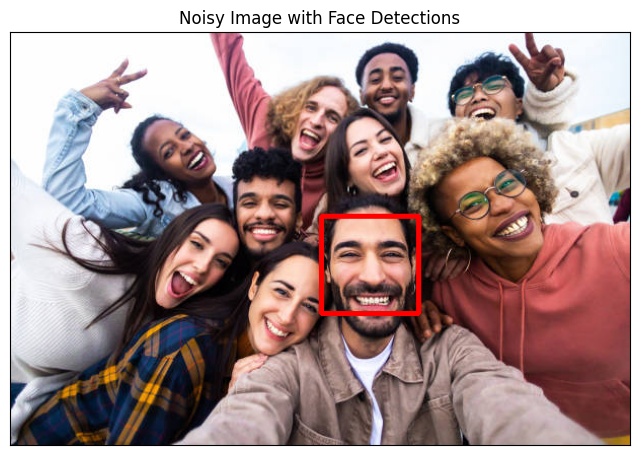

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image_with_noise = cv2.imread('noise.jpg')
image_with_noise = cv2.cvtColor(image_with_noise, cv2.COLOR_BGR2RGB)

gray_noise = cv2.cvtColor(image_with_noise, cv2.COLOR_RGB2GRAY)

face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

faces = face_cascade.detectMultiScale(gray_noise, scaleFactor=4, minNeighbors=6)

print('Number of faces detected:', len(faces))

image_with_detections = np.copy(image_with_noise)

for (x, y, w, h) in faces:
    cv2.rectangle(image_with_detections, (x, y), (x + w, y + h), (255, 0, 0), 3)

fig = plt.figure(figsize=(8, 8))
ax1 = fig.add_subplot(111)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_title('Noisy Image with Face Detections')
ax1.imshow(image_with_detections)
plt.show()

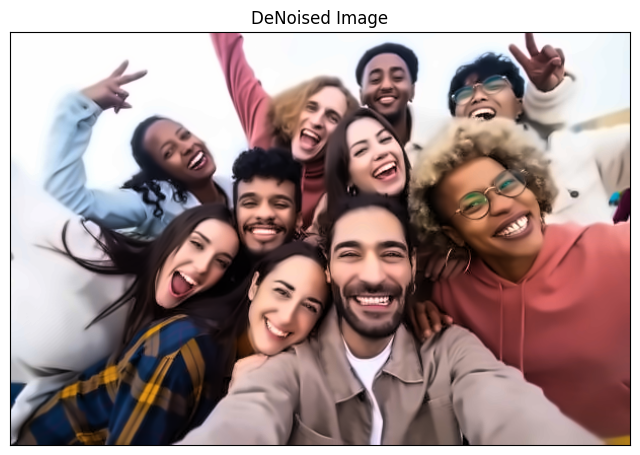

In [ ]:
denoised_image = cv2.fastNlMeansDenoisingColored(image_with_noise, None, 10, 10, 7, 21)

fig = plt.figure(figsize=(8, 8))
ax1 = fig.add_subplot(111)
ax1.set_xticks([])
ax1.set_yticks([])

ax1.set_title('DeNoised Image')
ax1.imshow(denoised_image)
plt.show()

Number of faces detected: 3


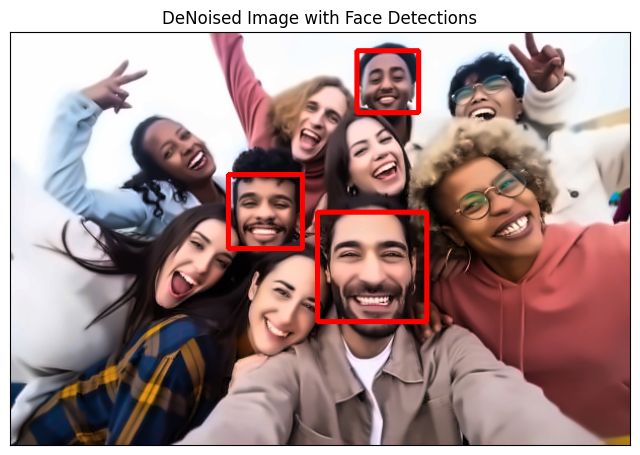

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image_with_noise = cv2.imread('noise.jpg')
image_with_noise = cv2.cvtColor(image_with_noise, cv2.COLOR_BGR2RGB)

denoised_image = cv2.fastNlMeansDenoisingColored(image_with_noise, None, 10, 10, 7, 21)

gray_noise_denoise = cv2.cvtColor(denoised_image, cv2.COLOR_RGB2GRAY)

face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
faces_denoise = face_cascade.detectMultiScale(gray_noise_denoise, 1.3, 6)

print('Number of faces detected:', len(faces_denoise))

image_with_detections_denoise = np.copy(denoised_image)

for (x, y, w, h) in faces_denoise:
    cv2.rectangle(image_with_detections_denoise, (x, y), (x + w, y + h), (255, 0, 0), 3)

fig = plt.figure(figsize=(8, 8))
ax1 = fig.add_subplot(111)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_title('DeNoised Image with Face Detections')
ax1.imshow(image_with_detections_denoise)
plt.show()

Applying Blur and Detecting Edges in an Image

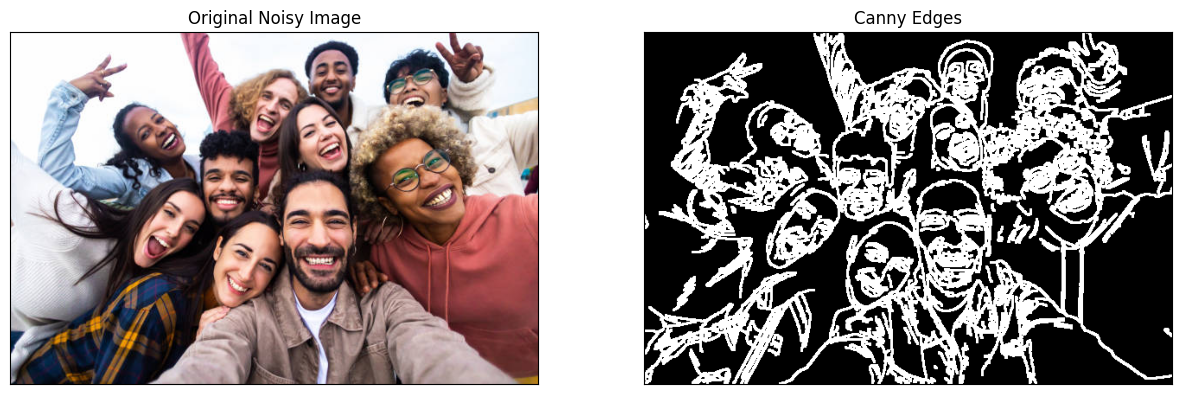

In [ ]:
# Load the noisy image
image = cv2.imread('noise.jpg')

# Convert to RGB colorspace
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# Perform Canny edge detection
edges = cv2.Canny(gray, 100, 200)

# Dilate the edges to amplify them
edges = cv2.dilate(edges, None)

# Plot the RGB and edge-detected image
fig = plt.figure(figsize=(15, 15))

ax1 = fig.add_subplot(121)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_title('Original Noisy Image')
ax1.imshow(image)

ax2 = fig.add_subplot(122)
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_title('Canny Edges')
ax2.imshow(edges, cmap='gray')

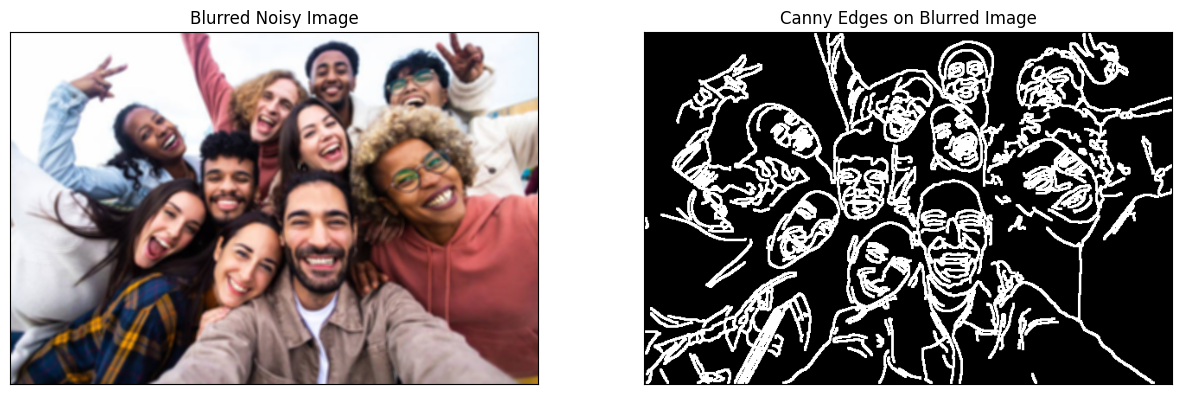

In [ ]:
# Orijinal görüntüyü kopyala
orig_img = np.copy(image)

# 4x4 boyutunda bir kernel ile bulanıklaştır
kernel = np.ones((4,4), np.float32)/16
blur = cv2.filter2D(orig_img, -1, kernel)

# Bulanıklaştırılmış görüntü üzerinde Canny edge detection uygula
edges_blur = cv2.Canny(blur, 100, 200)

# Kenarları belirginleştirmek için genişlet
edges_blur = cv2.dilate(edges_blur, None)

# RGB ve kenar tespit edilmiş görüntüyü çiz
fig = plt.figure(figsize=(15, 15))

ax1 = fig.add_subplot(121)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_title('Blurred Noisy Image')
ax1.imshow(blur)

ax2 = fig.add_subplot(122)
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_title('Canny Edges on Blurred Image')
ax2.imshow(edges_blur, cmap='gray')

Build the CNN Architecture

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization

# Initialize the CNN model
model = Sequential()

# 1st Convolutional Block
model.add(Conv2D(16, (3,3), activation='relu', input_shape=(96,96,1)))
model.add(BatchNormalization())  # Normalize activations
model.add(MaxPooling2D(pool_size=2))  # Downsample feature maps

# 2nd Convolutional Block
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=2))

# 3rd Convolutional Block
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=2))

# 4th Convolutional Block
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=2))

# Flatten the output from convolutional layers
model.add(Flatten())

# Fully connected layer
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))  # Prevent overfitting

# Output layer for regression (30 values)
model.add(Dense(30, activation='linear'))

# Print the model summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 94, 94, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 94, 94, 16)     │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 47, 47, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 45, 45, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 45, 45, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 22, 22, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 20, 20, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 20, 20, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 30)             │        15,390 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,162,590 (4.43 MB)

 Trainable params: 1,162,110 (4.43 MB)

 Non-trainable params: 480 (1.88 KB)

Train the Model

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

# -----------------------------
# Step 1: Create dummy data
# -----------------------------
# 1000 grayscale images of size 96x96
num_samples = 1000
images = np.random.rand(num_samples, 96, 96, 1).astype('float32')  # values between 0-1

# 30 keypoints per image (x, y coordinates)
keypoints = np.random.rand(num_samples, 30).astype('float32')  # values between 0-1

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(images, keypoints, test_size=0.2, random_state=42)

# -----------------------------
# Step 2: Build the CNN model
# -----------------------------
model = Sequential()
model.add(Conv2D(16, (3,3), activation='relu', input_shape=(96,96,1)))
model.add(MaxPooling2D(2))

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(2))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(2))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(30))  # 30 keypoints output

# -----------------------------
# Step 3: Compile the model
# -----------------------------
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# -----------------------------
# Step 4: Train the model
# -----------------------------
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=5,  # just for testing
    batch_size=32
)

Epoch 1/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 18s 365ms/step - loss: 0.1629 - mae: 0.3286 - val_loss: 0.0873 - val_mae: 0.2544
Epoch 2/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 273ms/step - loss: 0.0912 - mae: 0.2584 - val_loss: 0.0861 - val_mae: 0.2533
Epoch 3/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 12s 333ms/step - loss: 0.0891 - mae: 0.2559 - val_loss: 0.0847 - val_mae: 0.2518
Epoch 4/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 324ms/step - loss: 0.0877 - mae: 0.2553 - val_loss: 0.0850 - val_mae: 0.2520
Epoch 5/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 9s 271ms/step - loss: 0.0883 - mae: 0.2558 - val_loss: 0.0864 - val_mae: 0.2536


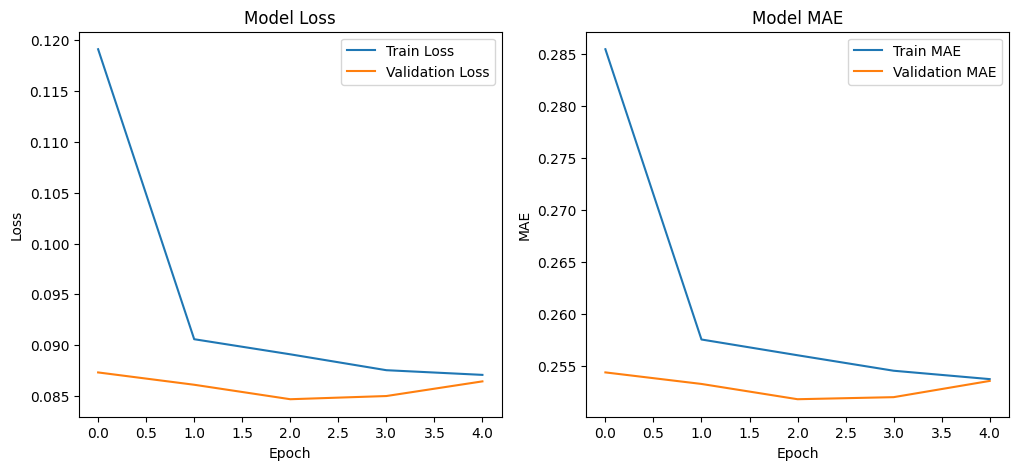

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.figure(figsize=(12,5))

# Loss
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# MAE
plt.subplot(1,2,2)
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()

plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np

# Example: if 'images' and 'keypoints' arrays exist
# Normalize images
images = images / 255.0

# Split into train, validation, and test
X_train, X_temp, y_train, y_temp = train_test_split(images, keypoints, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


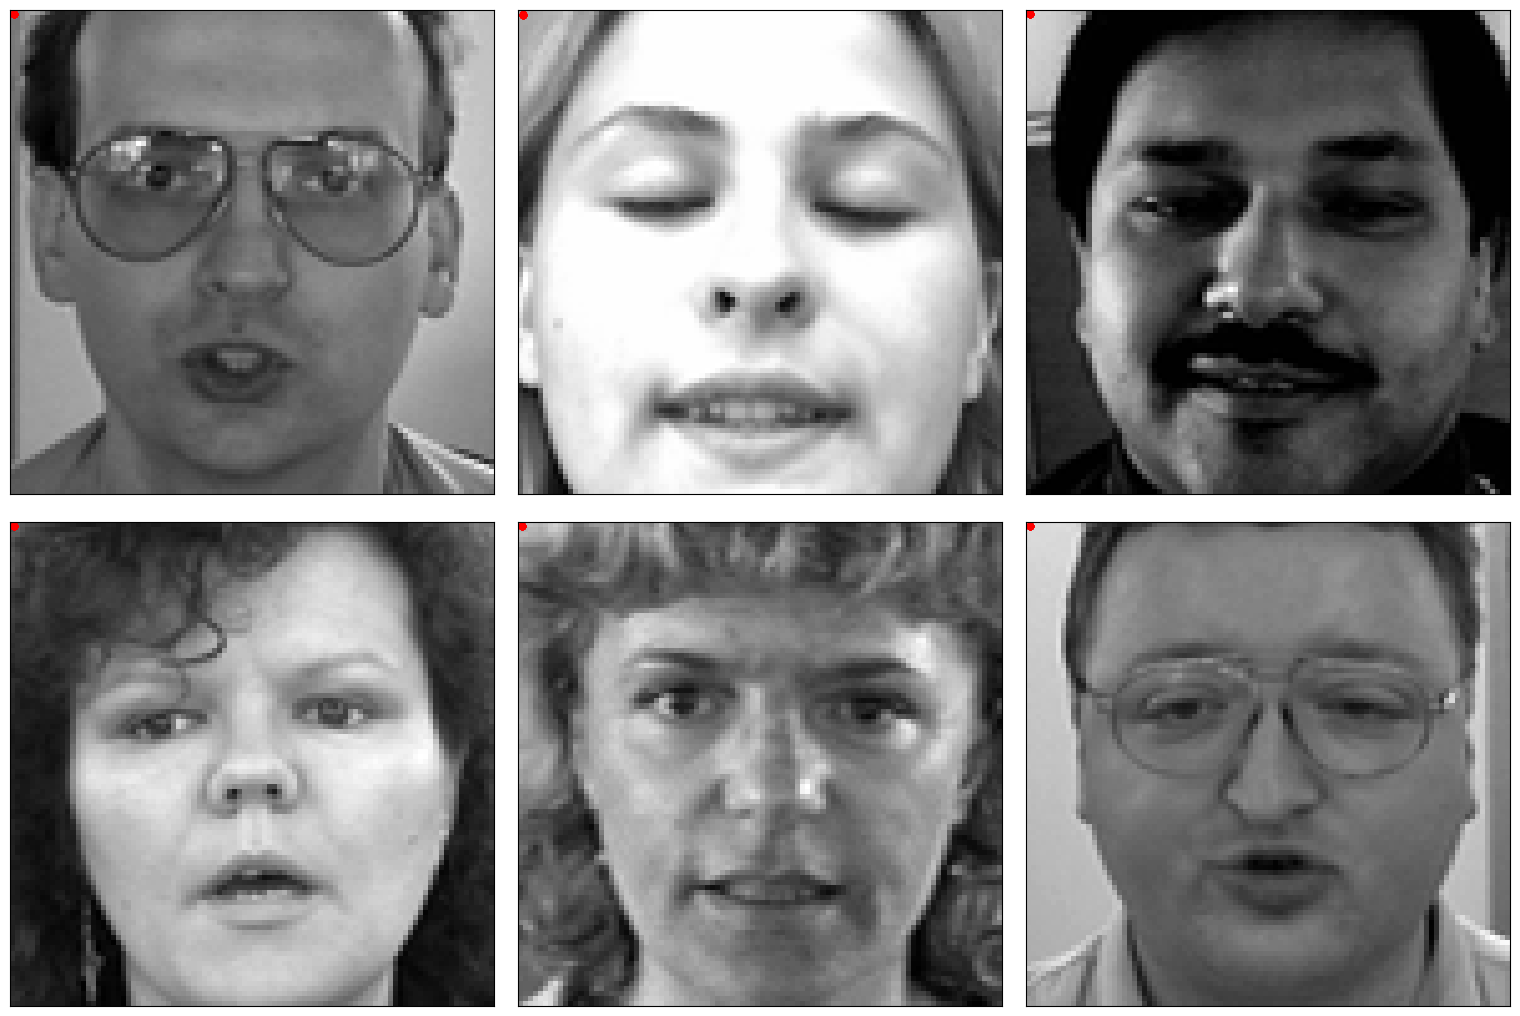

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Function to plot a single image with keypoints
def plot_data(image, keypoints, ax):
    """Plot a single 96x96 grayscale image with keypoints."""
    ax.imshow(image.reshape(96,96), cmap='gray')
    ax.scatter(keypoints[0::2], keypoints[1::2], c='red', s=20)  # keypoints in red

# Select 6 samples from the training data (or X_test if available)
samples = train.sample(6, random_state=42)

fig = plt.figure(figsize=(15,10))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i, (_, sample) in enumerate(samples.iterrows()):
    ax = fig.add_subplot(2, 3, i+1, xticks=[], yticks=[])

    # Prepare image for the model
    img = np.fromstring(sample["Image"], sep=" ").reshape(96,96)
    img_input = img / 255.0
    img_input = img_input.reshape(1, 96, 96, 1)

    # Predict keypoints
    predicted = model.predict(img_input).reshape(-1)

    # Plot image with predicted keypoints
    plot_data(img, predicted, ax)

plt.show()
